### Install pyFIM 

https://pyfim.readthedocs.io/en/latest/

**References**

Risse B, Berh D, Otto N, Klämbt C, Jiang X. FIMTrack: An open source tracking and locomotion analysis software for small animals. PLoS Computational Biology. 2017;13(5):e1005530. doi:10.1371/journal.pcbi.1005530.

Risse B, Otto N, Berh D, Jiang X, Klämbt C. FIM Imaging and FIMtrack: Two New Tools Allowing High-throughput and Cost Effective Locomotion Analysis. Journal of Visualized Experiments : JoVE. 2014;(94):52207. doi:10.3791/52207.

Risse B, Thomas S, Otto N, et al. FIM, a Novel FTIR-Based Imaging Method for High Throughput Locomotion Analysis. PLoS ONE. 2013;8(1):e53963. doi:10.1371/journal.pone.0053963.

In [ ]:
pip install git+git://github.com/schlegelp/pyfim@master

  Cloning git://github.com/schlegelp/pyfim (to revision master) to /tmp/pip-req-build-04rour1i
  Running command git clone -q git://github.com/schlegelp/pyfim /tmp/pip-req-build-04rour1i


### Load libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import pyfim

from google.colab import files

from matplotlib.colors import LogNorm
from scipy.ndimage.filters import gaussian_filter

import pickle

### Setup pyFIM

In [ ]:
import pyfim

pyfim.defaults['PIXEL_PER_MM'] = 1 #11.5
pyfim.defaults['PIXEL2MM'] = True

pyfim.defaults['MIN_TRACK_LENGTH'] = 2

pyfim.defaults['MAX_GAP_SIZE'] = 3 # default was 3

pyfim.defaults['FPS'] = 9.15

pyfim.defaults['MIN_STOP_PHASE'] = 5 # default 5

pyfim.defaults['BENDING_ANGLE_THRESHOLD'] = 1

pyfim.defaults['CUT_TABLE_HEAD'] = 0
pyfim.defaults['CUT_TABLE_TAIL'] = 0

pyfim.defaults['TC_CUT_HEAD'] = 0

### Upload data

In [ ]:
#OK
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QFoP63iVjUJZwGq8HWOXBc6x8FX6DeFO' -O "wt.zip"
!unzip "wt.zip"

#OK
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xfxnOY4POX6NAHSYAukVj91ZE9M2MuHs' -O "ilp7ko-8tracks2.zip"
!unzip "ilp7ko-8tracks2.zip"


#OK
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sl7aDma8bnitVMixABQ_SXm5hXMG0G53' -O "kirxilp7gal4_tracks.zip"
!unzip "kirxilp7gal4_tracks.zip"

#OK
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19-WSoPzn3WSUgXh1zVl6b_FPiz038O4P' -O "kirxLkgal4_tracks.zip"
!unzip "kirxLkgal4_tracks.zip"

# OK
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KQLeNPifeOoi9lI00EOynczSfc2jl5lS' -O "wtxkir.zip"
!unzip "wtxkir.zip"

#OK
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rkL2gao7SBS_DoEuCdT-TOfySNmERUxk' -O "kirx73bo1gal4-8tracks.zip"
!unzip "kirx73bo1gal4-8tracks.zip"

--2021-10-04 15:10:50--  https://docs.google.com/uc?export=download&id=1QFoP63iVjUJZwGq8HWOXBc6x8FX6DeFO
Resolving docs.google.com (docs.google.com)... 74.125.137.100, 74.125.137.102, 74.125.137.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.100|:443... connected.
HTTP request sent, awaiting response... ^C
Archive:  wt.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of wt.zip or
        wt.zip.zip, and cannot find wt.zip.ZIP, period.
--2021-10-04 15:10:51--  https://docs.google.com/uc?export=download&id=1xfxnOY4POX6NAHSYAukVj91ZE9M2MuHs
Resolving docs.google.com (docs.google.com)... 142.250.141.102, 142.250.141.113, 142.250.141.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.102|:443... connec

NameError: ignored

### pyFIM experiment exptraction

In [ ]:
exps = {}

fly_lines = ['wt-8_tracks', 'ilp7ko-8tracks2', 'wtxkir-8_tracks', 'kirx73bo1gal4-8tracks', 'kirxilp7gal4_tracks', 'kirxLkgal4_tracks']

for k, fly_line in enumerate(fly_lines):
 
    for i, file in enumerate(os.listdir('./' + fly_line + '/')):
      folder = (os.listdir('./' + fly_line + '/' + file))[0]
      file_path = './' + fly_line + '/' + file + '/' + folder + "/table.csv"   
      exp = pyfim.Experiment(file_path)
      key = fly_line + '_' + str(i)
      exps[key]=exp

INFO  : Data clean-up dropped 433 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 132 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 613 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 59 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 315 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 155 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 45 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 72 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 136 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 173 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 18 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 128 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 52 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 242 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 139 objects and 0 frames (pyfim)
INFO  : Data clean-up dropped 123 objects and 0 frames (pyfi

### Build a Pandas' dataframe and plot experiments

wt-8_tracks_0
wt-ethyl-B-125mM_27-06-21-v2
x_max 974.0
x_min 335.0
time in odor zone: 1202.00
time in non-odor zone: 0.00
total time: 12344.00
time in odor zone to total: 0.10
time in no odor zone to total: 0.00
PI: 1.00


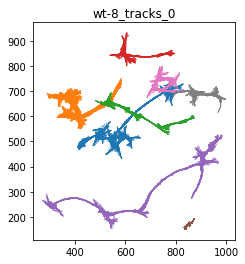

wt-8_tracks_1
wt-ethyl-B-125mM_27-06-21-v6
x_max 905.0
x_min 246.0
time in odor zone: 247.00
time in non-odor zone: 166.00
total time: 10801.00
time in odor zone to total: 0.02
time in no odor zone to total: 0.02
PI: 0.20


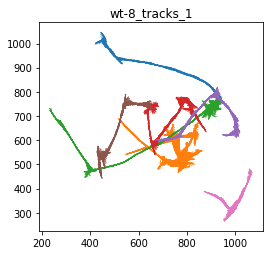

wt-8_tracks_2
wt-ethyl-B-125mM_27-06-21-v4
x_max 801.0
x_min 562.0
time in odor zone: 0.00
time in non-odor zone: 0.00
total time: 3086.00
time in odor zone to total: 0.00
time in no odor zone to total: 0.00


ZeroDivisionError: ignored

In [ ]:
plt.rcParams["figure.figsize"] = (4,4)

df = pd.DataFrame(columns=['line','recording','x_max','x_min','odor_zone_time','no_odor_zone_time','total_time' ,'fraction_odor','fraction_noodor','PI'])

fly_lines = ['wt-8_tracks', 'ilp7ko-8tracks2', 'wtxkir-8_tracks', 'kirx73bo1gal4-8tracks', 'kirxilp7gal4_tracks', 'kirxLkgal4_tracks']

rm_nan = lambda x: x[~np.isnan(x)]

for k, fly_line in enumerate(fly_lines):
 
    for i, file in enumerate(os.listdir('./' + fly_line + '/')):
      folder = (os.listdir('./' + fly_line + '/' + file))[0]
      file_path = './' + fly_line + '/' + file + '/' + folder + "/table.csv"   
      key = fly_line + '_' + str(i)

      print(key)

      print(file)

      framerange = -1200

      odor_y_postion = 628 #odor position 975,628  pm 200

      x_min = np.min( rm_nan( exps[key].spinepoint_2_x.iloc[-framerange:,:].to_numpy() ) )
      x_max = np.max( rm_nan(exps[key].spinepoint_2_x.iloc[-framerange:,:].to_numpy()))
      print("x_max", x_max)
      print("x_min", x_min)

      spinepoint_2_x_noodor_zone = (exps[key].spinepoint_2_x.iloc[-framerange:,:] < 310)
      spinepoint_2_x_odor_zone = (exps[key].spinepoint_2_x.iloc[-framerange:,:] > 840)

      top = (exps[key].spinepoint_2_y.iloc[-framerange:,:] < odor_y_postion+300)
      down = (exps[key].spinepoint_2_y.iloc[-framerange:,:] > odor_y_postion-300)

      odor = np.count_nonzero(rm_nan(spinepoint_2_x_odor_zone&top&down))
      no_odor = np.count_nonzero(rm_nan(spinepoint_2_x_noodor_zone&top&down))

      print("time in odor zone: %.2f" % odor )
      print("time in non-odor zone: %.2f" % no_odor)

      total_time =  np.count_nonzero(rm_nan(exps[key].spinepoint_2_x.iloc[-framerange:,:]))

      print("total time: %.2f" % total_time)
      fraction_odor = odor/total_time
      print("time in odor zone to total: %.2f" % (odor/total_time))
      fraction_noodor = no_odor/total_time
      print("time in no odor zone to total: %.2f" % (no_odor/total_time))
      PI = (odor-no_odor)/(odor+no_odor)
      print("PI: %.2f" % ((odor-no_odor)/(odor+no_odor)))

      exps[key].plot_tracks()
      plt.title(key)  
      plt.show()

      df = df.append({'line':fly_line,'recording':i,'x_max':x_max,'x_min':x_min,'odor_zone_time':odor,'no_odor_zone_time':no_odor ,'total_time':total_time ,'fraction_odor':fraction_odor,'fraction_noodor':fraction_noodor,'PI':PI}, ignore_index=True)

#WT x KIR

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(14,6))

sns.violinplot(x="line", y="PI", data=df[(df.line == 'wtxkir-8_tracks')|(df.line == 'kirx73bo1gal4-8tracks')|(df.line == 'kirxilp7gal4_tracks')|(df.line == 'kirxLkgal4_tracks') ], inner=None, cut=0.0, alpha=0.7, width=0.5)
sns.stripplot(x="line", y="PI",  data=df[(df.line == 'wtxkir-8_tracks')|(df.line == 'kirx73bo1gal4-8tracks')|(df.line == 'kirxilp7gal4_tracks')|(df.line == 'kirxLkgal4_tracks') ],color="black", edgecolor="gray",size=8,jitter=0.1)
#sns.catplot(x="line", y="PI", data=df[(df.line == 'wt-8_tracks')|(df.line == 'ilp7ko-8tracks2')])

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1 + 0.2, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color=col)

x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1 + 0.4, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color=col)

x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 1 + 0.6, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

plt.ylim([-1.0, 2.0])

plt.savefig("KIR-PI.svg")

plt.show()



In [ ]:
from scipy import stats

#Tukey's range tes is applied for the consistency with the rest of the work. 
#Note: strictly speaking the distribution for high PI is not normally distributed and its variance may also vary.

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

#https://jpktd.blogspot.com/2013/03/multiple-comparison-and-tukey-hsd-or_25.html
#https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values-into-matplotlib/37518947

print('*******************')
print('***Tukey\'s test***')
print('*******************')

for p in ['PI']:

  print("Parameter:", p, '\n')
  
  ###
  
  cat1 = df[(df.line == 'wtxkir-8_tracks')].PI.to_numpy()
  print(cat1)
  cat2 = df[(df.line == 'kirx73bo1gal4-8tracks')].PI.to_numpy()
  print(cat2)

  data = np.concatenate((cat1, cat2))
  groups = np.concatenate([ ['WT']*cat1.shape[0], ['kirx73bo1gal4']*cat2.shape[0] ])
  res2 = pairwise_tukeyhsd(data, groups, 0.05)
  print(res2)

  ### 

  print("\n \n")

  cat1 = df[(df.line == 'wtxkir-8_tracks')].PI.to_numpy()
  print(cat1)
  cat2 = df[(df.line == 'kirxilp7gal4_tracks')].PI.to_numpy()  #kirxilp7gal4_tracks
  print(cat2)

  data = np.concatenate((cat1, cat2))
  groups = np.concatenate([ ['WT']*cat1.shape[0], ['kirxilp7gal4']*cat2.shape[0] ])
  res2 = pairwise_tukeyhsd(data, groups, 0.05)
  print(res2)

  ###
  
  print("\n \n")

  cat1 = df[(df.line == 'wtxkir-8_tracks')].PI.to_numpy()
  print(cat1)
  cat2 = df[(df.line == 'kirxLkgal4_tracks')].PI.to_numpy()
  print(cat2)

  data = np.concatenate((cat1, cat2))
  groups = np.concatenate([ ['WT']*cat1.shape[0], ['kirxLkgal4']*cat2.shape[0] ])
  res2 = pairwise_tukeyhsd(data, groups, 0.05)
  print(res2)

# WT vs ilp4ko

In [ ]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(4,6))

sns.violinplot(x="line", y="PI", data=df[(df.line == 'wt-8_tracks')|(df.line == 'ilp7ko-8tracks2')], inner=None, cut=0.1, alpha=0.5, width=0.3)
sns.stripplot(x="line", y="PI", data=df[(df.line == 'wt-8_tracks')|(df.line == 'ilp7ko-8tracks2')],color="black", edgecolor="gray",size=8,jitter=0.05)
#sns.catplot(x="line", y="PI", data=df[(df.line == 'wt-8_tracks')|(df.line == 'ilp7ko-8tracks2')])


# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df[(df.line == 'wt-8_tracks')|(df.line == 'ilp7ko-8tracks2')]['PI'].max() + 0.2, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color=col)

plt.ylim([-1, 2])

plt.savefig("Ilp7ko-PI.svg")

plt.show()

In [ ]:
from scipy import stats

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

print('*******************')
print('***Tukey\'s test***')
print('*******************')

for p in ['PI']:

  print("Parameter:", p, '\n')

  cat1 = df[(df.line == 'wt-8_tracks')].PI.to_numpy()
  print(cat1)
  cat2 = df[(df.line == 'ilp7ko-8tracks2')].PI.to_numpy()
  print(cat2)

  data = np.concatenate((cat1, cat2))
  groups = np.concatenate([ ['WT']*cat1.shape[0], ['ilp7ko']*cat2.shape[0] ])
  res2 = pairwise_tukeyhsd(data, groups,0.05)
  print(res2)

*******************
***Tukey's test***
*******************
Parameter: PI 



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored